# The Data Wars: Code Clash in the Galactic Empire

### Act 3 - The Death Star Revisited
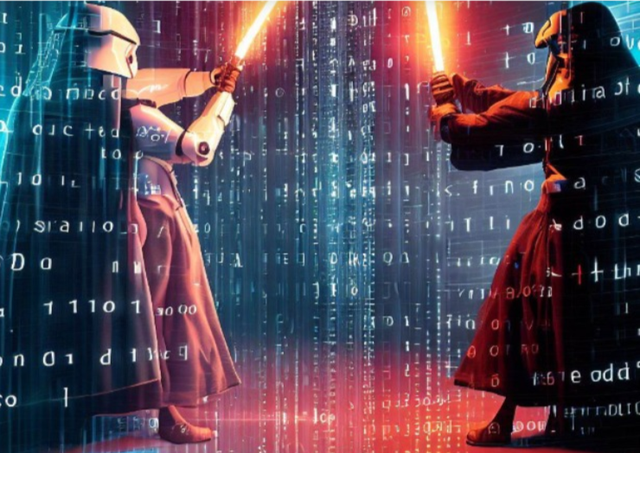

### Reviewing of the two sides in the data wars

According to the Data Wars conspect, we have:

#### Luke CodeWalker (Data scientist):
A daring Data Scientist committed to the Rebel Alliance, eager to explore, analyze, and understand the data to find strategic insights.

#### Darth Validator (Data owner): 
A vigilant Data Owner from the Galactic Empire, responsible for reviewing and approving code requests, ensuring no sensitive data leaks from the Empire's vaults.


## The Setup Phase

For a data war to happen... there must be data!

And even more than that: the data must be guarded properly behind the walls of the Darth Validator to minimise any privacy or data leaks and retain ownership of the data, but also accesible to Luke CodeWalker for him to fulfill his purpose of learning relevant information from the datasets, without having direct access to it.

Thus, let's see how the Galactic Empire has decided this should happen.

### Real data and mock data

How it works is that there will be two datasets:
- the real dataset, containing the true unaltered information
- a mock dataset, containing fake data generated to be of the same type to the real one

### High-side domain and low-side domain

The real dataset will be kept private in what is called **the high side domain**. Only the data manager have direct access to it, and not data scientists.

The mock dataset will be stored into the **low side domain** and you will have direct access to it via code request.

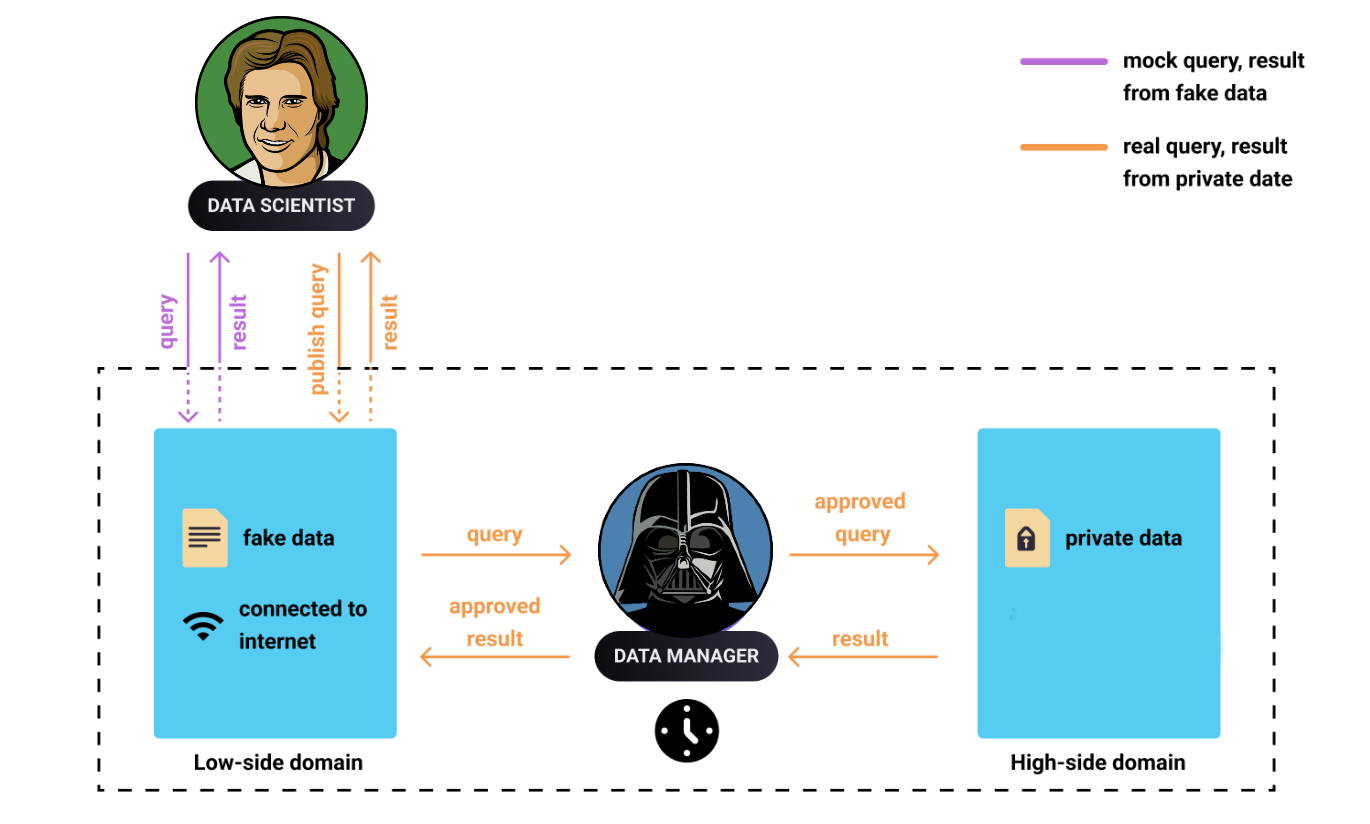

### Workflow altogether

Let's assume you are Luke CodeWalker and you would like to investigate the data hosted by Darth Validator.

**Prepare the query** (purple arrows)\
Luke knows what he would like to learn from Darth Validator's data, so he can prepare a code request, but will only be able to run it against the mock dataset on the low-side domain. The dataset will look and feel like the real one, but it won't contain the true data, thus useful for testing.

**Submit the code request** (orange arrows)\
Luke can submit the code query for approval from Darth Validator. The code is sent via PySyft API directly to the him, the data manager, who will check the code, make sure it is safe to be run on the private, highly secured data, and if so, Darth Validator will execute the code on the private data, and generate the answer.

**Get the answer** (orange arrows)\
After Darth Validator runs the code, he will also inspect the answer to make sure privacy is preserved before sharing it with his biggest enemy, Luke CodeWalker. If it is fine, Darth will send the unaltered answer which the function returned on the private, real data this time.


The setup will therefore consist of:
- prepare the low-side server
- generate and upload the data to the servers (real & mock)
- give access to the data scientist to the low-side
- check that we are ready

All you need to do is run through the following code cells without any change and checking that it worked, as the whole Galactic Empire (and the following steps) depend on it.

#### Please make sure you are running Python 3.9+. Galactic Empire does not accept less.

In [ ]:
!pip install -U syft --pre

In [3]:
# Imports

import syft as sy
from syft import autocache
import pandas as pd
import numpy as np

In [4]:
# Step 1. Launching the low-side

low_side_server = sy.orchestra.launch(name="galactic_empire", dev_mode=True, reset=True)

SQLite Store Path:
!open file:///tmp/d53bb40d0ba04b09a07035d5ab677a61.sqlite



In [5]:
# Step 2. Get a client to access the Galactic Empire Domain as a data manager 

low_side_client_darth_validator = low_side_server.login(email="info@openmined.org", password="changethis")
low_side_client_darth_validator

/home/ina/miniconda3/lib/python3.9/site-packages/IPython/core/formatters.py:365: FormatterWarning: text/html formatter returned invalid type <class 'type'> (expected <class 'str'>) for object: <SyftClient - galactic_empire <d53bb40d0ba04b09a07035d5ab677a61>: PythonConnection>
  warnings.warn(


<SyftClient - galactic_empire <d53bb40d0ba04b09a07035d5ab677a61>: PythonConnection>

In [6]:
# Step 3. Dataset loading

# As we do not have such a dataset, we generate it from scratch.

def generate_space_battles(num_battles, seed=42):
    # Set a seed for reproducibility
    np.random.seed(seed)

    # Generate random data for each column
    battle_id = np.arange(1, num_battles + 1)
    year = np.random.randint(20, 40, size=num_battles)  # Assuming the battles took place between year 20 and 40
    duration = np.random.uniform(1, 72, size=num_battles)  # Duration between 1 and 72 hours
    galactic_lat = np.random.uniform(-90, 90, size=num_battles)  # Galactic Latitude between -90 and 90
    galactic_long = np.random.uniform(-180, 180, size=num_battles)  # Galactic Longitude between -180 and 180
    rebel_forces = np.random.randint(1, 10000, size=num_battles)  # Number of Rebel ships involved
    empire_forces = np.random.randint(1, 10000, size=num_battles)  # Number of Empire ships involved
    rebel_casualties = np.random.randint(0, rebel_forces)  # Rebel casualties cannot exceed number of Rebel forces
    empire_casualties = np.random.randint(0, empire_forces)  # Empire casualties cannot exceed number of Empire forces
    outcome = np.random.randint(0, 2, size=num_battles)  # Outcome is either 0 (Empire won) or 1 (Rebels won)

    # Combine all columns into a DataFrame
    df = pd.DataFrame({
        'Battle ID': battle_id,
        'Year': year,
        'Duration': duration,
        'Galactic Latitude': galactic_lat,
        'Galactic Longitude': galactic_long,
        'Rebel Forces': rebel_forces,
        'Empire Forces': empire_forces,
        'Rebel Casualties': rebel_casualties,
        'Empire Casualties': empire_casualties,
        'Outcome': outcome
    })

    return df

private_data = generate_space_battles(1000)
mock_data = generate_space_battles(1000)

In [7]:
# Step 4. Upload the dataset to the low-side server

battle_dataset = sy.Dataset(
    name="Data wars battle dataset",
    description="""Contains the data of all the spacewars fought""",
    asset_list=[
        sy.Asset(
            name="battles",
            description="""Contains the details for all the battles fought in space""",
            data=private_data,
            mock=mock_data
        ),
    ],
)
battle_dataset.add_contributor(
    role=sy.roles.UPLOADER, 
    name="Darth SkyWalker", 
    email="darth@skywalker.com",
    note="Darth Walker makes everything happen in space")

low_side_client_darth_validator.upload_dataset(battle_dataset)

0it [00:00, ?it/s]


<class 'syft.service.response.SyftSuccess'>: Dataset Added

In [8]:
# Step 5. Create an account for Luke CodeWalker to access the low-side domain

low_side_client_darth_validator.register(
    name="Luke CodeWalker",
    email="luke@galactic-empire.edu",
    password="codewalker")

<class 'syft.service.response.SyftSuccess'>: User successfully registered!

In [9]:
# Step 6. Get a client to access the Galactic Empire Low-side Domain as a data scientst

low_side_client_luke_codewalker = low_side_server.login(email="luke@galactic-empire.edu", password="codewalker")
low_side_client_luke_codewalker

/home/ina/miniconda3/lib/python3.9/site-packages/IPython/core/formatters.py:365: FormatterWarning: text/html formatter returned invalid type <class 'type'> (expected <class 'str'>) for object: <SyftClient - galactic_empire <d53bb40d0ba04b09a07035d5ab677a61>: PythonConnection>
  warnings.warn(


<SyftClient - galactic_empire <d53bb40d0ba04b09a07035d5ab677a61>: PythonConnection>

In [11]:
# Step 7. Create a project called 'Death Star' on the domain
project_deathstar = sy.Project(
    name="Death Star",
    description="""This analysis will entail dissecting battle outcomes, the number of forces involved, the relationship between force size and casualties, battle durations, and other critical variables. The aim would be to understand the patterns of these space battles, which will help predict future battle outcomes and possibly influence strategies to dismantle the Death Star. """,
    members=[low_side_client_luke_codewalker],
)

project_deathstar.start()
project_deathstar

```python
class ProjectSubmit:
  id: str = be76cf7985ca4b0bbc6b866f425c0bb6
  name: str = "Battlefront Analysis: Strategic Insights for Project Death Star"
  description: str = "This analysis will entail dissecting battle outcomes, the number of forces involved, the relationship between force size and casualties, battle durations, and other critical variables. The aim would be to understand the patterns of these space battles, which will help predict future battle outcomes and possibly influence strategies to dismantle the Death Star. "
  created_by: str = "luke@galactic-empire.edu"

```

### NOTES

For easiness, we compiled the whole act in one notebook, which means you will switch hats often - from being Luke CodeWalker to being Darth Validator and back, to cover each part of the workflow. Make sure that when you refer to the domain as Luke - you use `low_side_client_luke_codewalker` and when you refer to the domain as Darth (data manager) - you use `low_side_client_darth_validator`.

## Into the Adventure

Once the setup phase is complete, you are free to follow replicating the act that has been assigned to you.

We'll guide your way, but refering to documentation will be necessary often to figure out how to succed.

Remember, your role in this saga is crucial; the Empire and Rebel Alliance both rely on your acumen and skills. So gear up, ignite your lightsaber, and step into the world of Syft, where data security and privacy matter as much as the force itself.

May the Force (of Syft) be with you!

# Act 3 - The Death Star Revisited

## Scene 1: 

As Luke CodeWalker, undeterred, you dive back into a previous project of yours - Project Death Star, drafting a new code request and sending them to Darth Validator. This request looks into calculating the standard deviation of casualties across all battles and filtering battles based on their outcome.

Using Syft, you need to create this code request on the dataset called `Data wars battle dataset` on an existing project called `Death Star`.

Let's get to it.

### Step 1.1:  Luke CodeWalker finds dataset 

In [ ]:
# Inspect what datasets are hosted in the domain

Fill in the code here

In [ ]:
# Inspect what assets are hosted under the dataset named 'Data wars battle dataset'

Fill in the code here

In [ ]:
# Inspect each asset 

Fill in the code here

### Step 1.2: Luke CodeWalker tests the code against mock data

In [ ]:
# Uncomment the code below to define the methods requested for testing

# def casualty_std_dev(battle_data):
#     import numpy as np
#     import pandas as pd
#     from opendp.mod import enable_features
#     enable_features('contrib')
#     from opendp.measurements import make_base_laplace

#     # Calculating the standard deviation of casualties across all battles
#     casualty_std_dev = np.std(battle_data['Casualties'])
#     base_lap = make_base_laplace(scale=50.)
#     noise = base_lap(casualty_std_dev)

#     return noise

In [ ]:
# Test the method against the mock data on the domain

Fill in the code here

### Step 1.3: Luke CodeWalker creates the code request

Darth Validator is taking extra steps dealing with Luke\'s requests, who is a known Jedi Knight. Thus, he will only accept remote code execution that:
- can only be run once on the private data
- can only be run only on the specified dataset
- can only be run without any modification to the code sent

Let's see how we transform the Python methods define above to be compliant with Darth Validator's strict requirements.

In [ ]:
# Re-define method to be compliant with the requests above.

Fill in the code here

### Step 1.4: Luke finds the project 'Death Star' and sends the request


In [ ]:
# Retrieve existing project by name from domain

Fill in the code here

In [ ]:
# Send the code request as part of the project

Fill in the code here

In [ ]:
# Check the requests were registered on the project

Fill in the code here

In [ ]:
# Inspect the code has succesfully reached the domain

Fill in the code here

### Step 1.5: Luke checks if his request got answered


In [ ]:
# Checks the status of requests

Fill in the code here

## Scene 2: 

Darth Validator is back and a new threat has appeared: incoming code requests from none other than Luke CodeWalker. 

As Darth Validator, you erroneously send back the incorrect response to the casualty standard deviation request due to the barrage of requests.

### Step 2.1: Darth Validator check for projects submitted to his domain


In [ ]:
# Inspect projects on the domain

Fill in the code here

In [ ]:
# Inspect if there are pending requests attached to the project

Fill in the code here

### Step 2.2: Darth Validator submits the wrong response

In [ ]:
# Get the pending request

Fill in the code here

In [ ]:
# Check the code under request without running it

Fill in the code here

In [ ]:
# Retrieve the callable function for running and run it on mock data

Fill in the code here

In [ ]:
# Run the callable function on the private data

Fill in the code here

In [ ]:
# Deposit the wrong result, by uncommenting the one below

# result = 100
Fill in the code here

### Step 2.3: Confirm no pending project requests

In [ ]:
# Check the status of all requests under the project

Fill in the code here

## Scene 3: 


As Darth Validator, you realize the error, you correct your mistake and resend the correct response to Luke CodeWalker.

In [ ]:
# Get the correct result by looking a few cells above
# Replace the wrong result deposited on the previous request

Fill in the code here

## Scene 4: 


As Luke CodeWalker, you check if the response has been sent by Darth Validator.

In [ ]:
# Check the status of request on project 'Death Star'

Fill in the code here

In [ ]:
# Get the responde to your request, as it should show as approved. 

Fill in the code here

# Success! 